In [25]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import gspread as gs
import warnings
import sys
yf.pdr_override()
warnings.filterwarnings('ignore')

In [26]:
gc = gs.service_account(filename="C:/Users/leste/OneDrive/Desktop/Python files/mypythonprogrammes/Mydatafiles/service_account.json")

In [27]:
google_spreadsheet = gc.open_by_url("https://docs.google.com/spreadsheets/d/1cM1pMxHZof65AeVIUJphyYZze3Ew0myrzqlmg9tvQdg/edit#gid=1044390699")

<font face = "Times New Roman" size = 5> Creating DataFrames </font>

In [28]:

def extract_sheets():
    token_ids = []
    sheets = google_spreadsheet.worksheets()
    for sheet in sheets:
        token_ids.append(sheet)
    return token_ids
    
extract_sheets()
    

[<Worksheet 'AAPL' id:0>,
 <Worksheet 'MSFT' id:177394609>,
 <Worksheet 'GOOG' id:1261668908>,
 <Worksheet 'AMZN' id:1631741944>,
 <Worksheet 'TSLA' id:1799150376>,
 <Worksheet 'NVDA' id:669265052>,
 <Worksheet 'META' id:1044390699>]

In [29]:
stock_dict = {}

def declare_dataframes():
    
    for tickers in extract_sheets():
        df = pd.DataFrame(tickers.get_all_records())
        stock_dict.update({f"{tickers.title}_stock" : df})
      
        
   
declare_dataframes()

<font face = "Times New Roman" size = 5>Parsing dates</font>

In [30]:


def to_datetime(dataframes):
    try:
        
        for data_frame in dataframes:
            if len(stock_dict) != len(extract_sheets()):
                sys.exit("The no. of google sheets does not match the count of dataframe objects")
            else:
                data_frame.set_index("Date",inplace = True)
                data_frame.index = pd.to_datetime(data_frame.index , infer_datetime_format= True)
                warnings.filterwarnings('ignore')
                
    
    except KeyError:
        print("FUNCTION EXECUTED SUCCESSFULLY")
        print(type(data_frame.index))

to_datetime(stock_dict.values())

In [35]:

stock_datacolumns = {}
token_ids_title = [x.title for x in extract_sheets()]
column_names = ['Close', 'Volume', 'Adj Close']
print(token_ids_title)

def columnn_segregation():
   dfs = pd.DataFrame()
   for t in token_ids_title:
      for column_name in column_names:
                dfs[t] = pdr.DataReader(t,start = "2017-1-1")[f"{column_name}"]
                stock_datacolumns.update({f"{column_name}_data" : dfs})
      
                
    
columnn_segregation()


['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'META']
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********************

In [36]:
for ticker in token_ids_title:
    stock_dict[f"{ticker}_stock"]["Adj Close"] = stock_datacolumns["Adj Close_data"][f"{ticker}"].values

Calculating simple rate of return on stocks

In [37]:
stock_dict["AAPL_stock"]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-03-01 16:00:00,28.95,29.08,28.69,29.04,28781865,27.174759
2017-04-01 16:00:00,28.96,29.13,28.94,29.01,21118116,27.144341
2017-05-01 16:00:00,28.98,29.22,28.95,29.15,22193587,27.282381
2017-06-01 16:00:00,29.20,29.54,29.12,29.48,31751900,27.586536
2017-09-01 16:00:00,29.49,29.86,29.49,29.75,33561948,27.839207
...,...,...,...,...,...,...
2022-12-22 16:00:00,134.35,134.56,130.30,132.23,77852108,132.229996
2022-12-23 16:00:00,130.92,132.42,129.64,131.86,63814893,131.860001
2022-12-27 16:00:00,131.38,131.41,128.72,130.03,69007830,130.029999


To calculate the average rate of return we need to take into consideratin the no. of trading days that are present in a year 

In [38]:
for x in range(2017,2022):
    print(len(stock_dict["AAPL_stock"][f"{x}"].index))


251
251
252
253
252


So considering all the years (even leap years) there are approximately 250 trading days in a year

In [39]:
def average_rate_of_return():
    for ticker in token_ids_title:
        stock_dict[f"{ticker}_stock"]["Simple Rate of return"] = (stock_dict[f"{ticker}_stock"]["Adj Close"]/stock_dict[f"{ticker}_stock"]["Adj Close"].shift(1))-1
        rate_of_return = stock_dict[f"{ticker}_stock"]["Simple Rate of return"].mean()*250
        print(f"The average rate of return for {ticker} is ", round(rate_of_return,7)*100, "%")

average_rate_of_return()


The average rate of return for AAPL is  30.808829999999997 %
The average rate of return for MSFT is  27.89174 %
The average rate of return for GOOG is  17.808799999999998 %
The average rate of return for AMZN is  18.98723 %
The average rate of return for TSLA is  54.098789999999994 %
The average rate of return for NVDA is  41.70044 %
The average rate of return for META is  8.70626 %


In [41]:
def logarithm_rate_of_return():
    for ticker in token_ids_title:
        stock_dict[f"{ticker}_stock"]["Log return"] = np.log(stock_dict[f"{ticker}_stock"]["Adj Close"]/stock_dict[f"{ticker}_stock"]["Adj Close"].shift(1))
        rate_of_return = stock_dict[f"{ticker}_stock"]["Log return"].mean()*250
        print(f"The log rate of return for {ticker} is ", round(rate_of_return,7)*100, "%")
logarithm_rate_of_return()


The log rate of return for AAPL is  25.89923 %
The log rate of return for MSFT is  23.71565 %
The log rate of return for GOOG is  13.53899 %
The log rate of return for AMZN is  13.324520000000001 %
The log rate of return for TSLA is  35.324 %
The log rate of return for NVDA is  29.162209999999998 %
The log rate of return for META is  0.47545 %


In [42]:
stock_dict["AAPL_stock"]

,Open,High,Low,Close,Volume,Adj Close,Simple Rate of return,Log return
Date,,,,,,,,
2017-03-01 16:00:00,28.95,29.08,28.69,29.04,28781865,27.174759,NaN,NaN
2017-04-01 16:00:00,28.96,29.13,28.94,29.01,21118116,27.144341,-0.001119,-0.001120
2017-05-01 16:00:00,28.98,29.22,28.95,29.15,22193587,27.282381,0.005085,0.005073
2017-06-01 16:00:00,29.20,29.54,29.12,29.48,31751900,27.586536,0.011148,0.011087
2017-09-01 16:00:00,29.49,29.86,29.49,29.75,33561948,27.839207,0.009159,0.009117
...,...,...,...,...,...,...,...,...
2022-12-22 16:00:00,134.35,134.56,130.30,132.23,77852108,132.229996,-0.023773,-0.024060
2022-12-23 16:00:00,130.92,132.42,129.64,131.86,63814893,131.860001,-0.002798,-0.002802
2022-12-27 16:00:00,131.38,131.41,128.72,130.03,69007830,130.029999,-0.013878,-0.013976


Applying Normalization

We use Normalization to visualize the data because we want to facilitate a comparison between the stock prices as if they were starting from a common point

if we don't use normalization we'll encounter variations at the beginning of the plot which won't help in analysis

<AxesSubplot: xlabel='Date'>

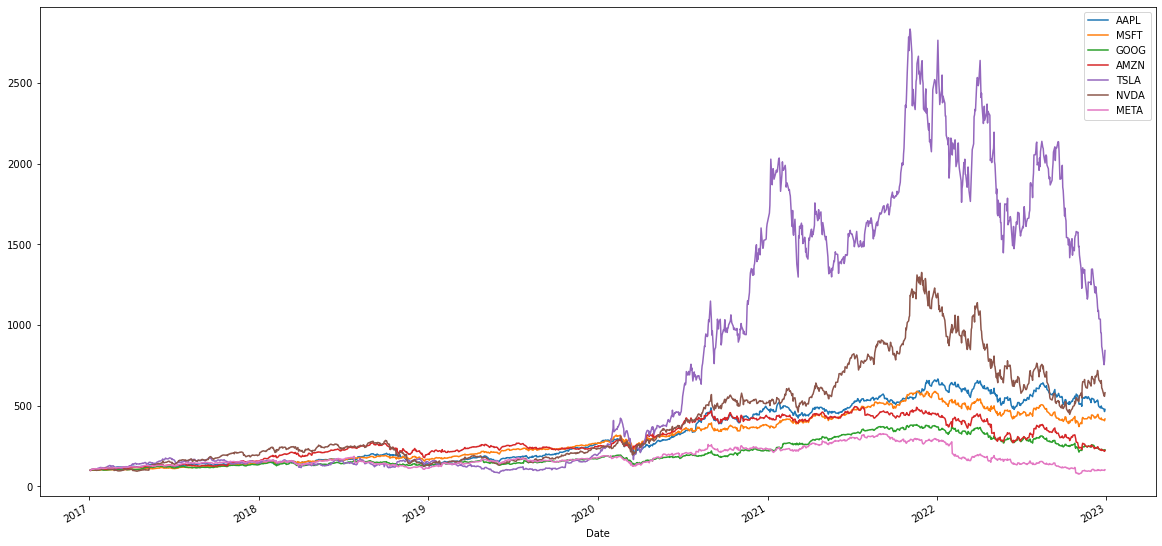

In [59]:
(stock_datacolumns["Adj Close_data"]/stock_datacolumns["Adj Close_data"].iloc[0]*100).plot(figsize = (20,10))